## Import Packages

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import json 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    certifi-2020.11.8          |   py36h5fab9bb_0         150 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         392 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch

In [3]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-20.3.0               |     pyhd3deb0d_0          41 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36he6145b8_1001         347 KB  conda-forge
    chardet-3.0.4              |py36h9880bd3_1008         194 KB  conda-forge
    cryptography-3.2.1         |   py36h6ec43e4

In [4]:
!conda install lxml -c conda-forge --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libxml2-2.9.10             |       hb55368b_3         1.2 MB
    libxslt-1.1.34             |       hc22bd24_0         432 KB
    lxml-4.6.1                 |   py36h17c4326_0         1.4 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  libxslt            pkgs/main/linux-64::libxslt-1.1.34-hc22bd24_0
  lxml               conda-forge/linux-64::lxml-4.6.1-py36h17c4326_0

The fol

In [5]:
# Word Clouds
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         324 KB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/linux-64::wordcloud-1.4.1-py36_0



wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn import preprocessing

# Clustering Vienna

### Get location data for Vienna

In [8]:
#read data on Austria's districts

df = pd.read_excel('http://www.statistik.at/verzeichnis/reglisten/polbezirke_en.xls')
df.head()


Political District, Key Date 2020                 Unnamed: 1  \
0                      Compiled on:  12 November 2020 13:25:43   
1                               NaN                        NaN   
2          Fed. Province Identifier           Federal Province   
3                                 1                 Burgenland   
4                                 1                 Burgenland   

                 Unnamed: 2          Unnamed: 3          Unnamed: 4  
0                       NaN                 NaN                 NaN  
1                       NaN                 NaN                 NaN  
2  Pol. District Identifier  Political District  Pol. District Code  
3                       101   Eisenstadt(Stadt)                 101  
4                       102         Rust(Stadt)                 102

### Data Cleaning

In [9]:
#remove columns that will not be needed 
df = df[['Unnamed: 1','Unnamed: 3']]
#df.drop(['Political District, Key Date 2020','Unnamed: 2','Unnamed: 4'],axis=1, inplace=True)
df.head()

Unnamed: 1          Unnamed: 3
0  12 November 2020 13:25:43                 NaN
1                        NaN                 NaN
2           Federal Province  Political District
3                 Burgenland   Eisenstadt(Stadt)
4                 Burgenland         Rust(Stadt)

In [10]:
#drop all rows that do not relate to Vienna
df = df.drop(df[df['Unnamed: 1'] != 'Vienna'].index, inplace= False)
df = df.reset_index(drop=True)
df

Unnamed: 1                     Unnamed: 3
0      Vienna                    Wien(Stadt)
1      Vienna          Wien  1.,Innere Stadt
2      Vienna          Wien  2.,Leopoldstadt
3      Vienna            Wien  3.,Landstraße
4      Vienna                Wien  4.,Wieden
5      Vienna            Wien  5.,Margareten
6      Vienna             Wien  6.,Mariahilf
7      Vienna                Wien  7.,Neubau
8      Vienna            Wien  8.,Josefstadt
9      Vienna            Wien  9.,Alsergrund
10     Vienna             Wien 10.,Favoriten
11     Vienna             Wien 11.,Simmering
12     Vienna              Wien 12.,Meidling
13     Vienna              Wien 13.,Hietzing
14     Vienna               Wien 14.,Penzing
15     Vienna  Wien 15.,Rudolfsheim-Fünfhaus
16     Vienna             Wien 16.,Ottakring
17     Vienna               Wien 17.,Hernals
18     Vienna               Wien 18.,Währing
19     Vienna               Wien 19.,Döbling
20     Vienna           Wien 20.,Brigittenau
21     Vienna           Wien 21.,Floridsdorf
22     Vienna            Wien 22.,Donaustadt
23     Vienna               Wien 23.,Liesing


- Drop the first column since we no longer need it
- Drop the first row since it is not a district but an entry for the whole city of Vienna 

In [11]:
df.drop(['Unnamed: 1'],axis=1, inplace=True)
df.drop(df.index[0], inplace = True)
df = df.reset_index(drop=True)
#df.rename(columns = {'Unnamed: 3':'VDistricts'}, inplace = True)
df

Unnamed: 3
0           Wien  1.,Innere Stadt
1           Wien  2.,Leopoldstadt
2             Wien  3.,Landstraße
3                 Wien  4.,Wieden
4             Wien  5.,Margareten
5              Wien  6.,Mariahilf
6                 Wien  7.,Neubau
7             Wien  8.,Josefstadt
8             Wien  9.,Alsergrund
9              Wien 10.,Favoriten
10             Wien 11.,Simmering
11              Wien 12.,Meidling
12              Wien 13.,Hietzing
13               Wien 14.,Penzing
14  Wien 15.,Rudolfsheim-Fünfhaus
15             Wien 16.,Ottakring
16               Wien 17.,Hernals
17               Wien 18.,Währing
18               Wien 19.,Döbling
19           Wien 20.,Brigittenau
20           Wien 21.,Floridsdorf
21            Wien 22.,Donaustadt
22               Wien 23.,Liesing

#### Create a dataframe for the district names and coordinates

In [12]:
# define the dataframe columns
column_names = ['V_Districts', 'Latitude', 'Longitude'] 

# instantiate the dataframe
Vien_df = pd.DataFrame(columns=column_names)

Vien_df

Empty DataFrame
Columns: [V_Districts, Latitude, Longitude]
Index: []

### Geocoding Vienna's Districts
- use geocoder to loop through the districts and retrieve the coordinates for the districts 
- append them to the data frame


In [13]:

for x in df['Unnamed: 3']:
    geolocator = Nominatim(user_agent="HC_explorer")
    location = geolocator.geocode(x)
    Vlat_lon =(location.latitude,location.longitude)
    Vlat = Vlat_lon[0]
    Vlon =Vlat_lon[1]
    
    Vien_df = Vien_df.append({'V_Districts' : x,
                              'Latitude' : Vlat,
                             'Longitude' : Vlon}, ignore_index = True)
Vien_df

V_Districts   Latitude  Longitude
0           Wien  1.,Innere Stadt  48.209023  16.369851
1           Wien  2.,Leopoldstadt  48.200638  16.426948
2             Wien  3.,Landstraße  48.206791  16.384780
3                 Wien  4.,Wieden  48.195803  16.367197
4             Wien  5.,Margareten  48.191727  16.358610
5              Wien  6.,Mariahilf  48.199293  16.352750
6                 Wien  7.,Neubau  48.202092  16.349042
7             Wien  8.,Josefstadt  48.210852  16.347360
8             Wien  9.,Alsergrund  48.225073  16.358398
9              Wien 10.,Favoriten  48.174415  16.381225
10             Wien 11.,Simmering  48.174079  16.399231
11              Wien 12.,Meidling  48.177877  16.330686
12              Wien 13.,Hietzing  48.187576  16.304581
13               Wien 14.,Penzing  48.192943  16.304245
14  Wien 15.,Rudolfsheim-Fünfhaus  48.195475  16.326301
15             Wien 16.,Ottakring  48.212593  16.312622
16               Wien 17.,Hernals  48.220934  16.327967
17               Wien 18.,Währing  48.230005  16.343063
18               Wien 19.,Döbling  48.261251  16.328471
19           Wien 20.,Brigittenau  48.243360  16.375942
20           Wien 21.,Floridsdorf  48.251569  16.387661
21            Wien 22.,Donaustadt  48.226966  16.494484
22               Wien 23.,Liesing  48.136339  16.287954

#### Retrieve the coordinates for Vienna

In [14]:
Vienna_location = geolocator.geocode('Vienna,Austria')
Vienna_latitude = Vienna_location.latitude
Vienna_longitude = Vienna_location.longitude
print('The geograpical coordinates of Vienna are {}, {}.'.format(Vienna_latitude, Vienna_longitude))

The geograpical coordinates of Vienna are 48.2083537, 16.3725042.


In [17]:
# create map of Vienna using latitude and longitude values
map_vienna = folium.Map(location=[Vienna_latitude, Vienna_longitude], zoom_start=11)

# add markers to map
for lat, lng, v_district in zip(Vien_df['Latitude'], Vien_df['Longitude'], Vien_df['V_Districts']):
    label = '{}'.format(v_district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vienna)  
    
map_vienna

## Getting Venues

In [18]:
CLIENT_ID = '30TK32EWSUJ0QWYGHCNDZIWM112CBINSMME5MPMXPBM1LZ5E' # your Foursquare ID
CLIENT_SECRET = 'IGCDA05U20NP12IPND1WD15KYTL04E34BO22PYJLPG5XJLQZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value


print('Foursquare Credentials have been passed')


Foursquare Credentials have been passed


#### Create the URL that will get you the venues

In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API


radius = 500 # define radius



def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Send a function to get the venues

In [20]:
vienna_venues = getNearbyVenues(names=Vien_df['V_Districts'],
                                   latitudes=Vien_df['Latitude'],
                                   longitudes=Vien_df['Longitude']
                                  )

Wien  1.,Innere Stadt
Wien  2.,Leopoldstadt
Wien  3.,Landstraße
Wien  4.,Wieden
Wien  5.,Margareten
Wien  6.,Mariahilf
Wien  7.,Neubau
Wien  8.,Josefstadt
Wien  9.,Alsergrund
Wien 10.,Favoriten
Wien 11.,Simmering
Wien 12.,Meidling
Wien 13.,Hietzing
Wien 14.,Penzing
Wien 15.,Rudolfsheim-Fünfhaus
Wien 16.,Ottakring
Wien 17.,Hernals
Wien 18.,Währing
Wien 19.,Döbling
Wien 20.,Brigittenau
Wien 21.,Floridsdorf
Wien 22.,Donaustadt
Wien 23.,Liesing


In [21]:
print(vienna_venues.shape)
vienna_venues.head()

(823, 7)


District  District Latitude  District Longitude  \
0  Wien  1.,Innere Stadt          48.209023           16.369851   
1  Wien  1.,Innere Stadt          48.209023           16.369851   
2  Wien  1.,Innere Stadt          48.209023           16.369851   
3  Wien  1.,Innere Stadt          48.209023           16.369851   
4  Wien  1.,Innere Stadt          48.209023           16.369851   

                Venue  Venue Latitude  Venue Longitude    Venue Category  
0       Stephansplatz       48.208299        16.371880             Plaza  
1  DO & CO Restaurant       48.208240        16.371758        Restaurant  
2              Graben       48.208915        16.369379  Pedestrian Plaza  
3         Stephansdom       48.208626        16.372672            Church  
4                 COS       48.209359        16.371591    Clothing Store

#### Group Neighbourhoods by count of venues

In [22]:
vienna_venues.groupby('District').count()

District Latitude  District Longitude  Venue  \
District                                                                      
Wien  1.,Innere Stadt                        100                 100    100   
Wien  2.,Leopoldstadt                          4                   4      4   
Wien  3.,Landstraße                           42                  42     42   
Wien  4.,Wieden                               59                  59     59   
Wien  5.,Margareten                           74                  74     74   
Wien  6.,Mariahilf                            78                  78     78   
Wien  7.,Neubau                              100                 100    100   
Wien  8.,Josefstadt                           74                  74     74   
Wien  9.,Alsergrund                           48                  48     48   
Wien 10.,Favoriten                            37                  37     37   
Wien 11.,Simmering                            11                  11     11   
Wien 12.,Meidling                             35                  35     35   
Wien 13.,Hietzing                             37                  37     37   
Wien 14.,Penzing                               8                   8      8   
Wien 15.,Rudolfsheim-Fünfhaus                 26                  26     26   
Wien 16.,Ottakring                            18                  18     18   
Wien 17.,Hernals                              19                  19     19   
Wien 18.,Währing                              13                  13     13   
Wien 19.,Döbling                               3                   3      3   
Wien 20.,Brigittenau                          15                  15     15   
Wien 21.,Floridsdorf                          10                  10     10   
Wien 22.,Donaustadt                            4                   4      4   
Wien 23.,Liesing                               8                   8      8   

                               Venue Latitude  Venue Longitude  Venue Category  
District                                                                        
Wien  1.,Innere Stadt                     100              100             100  
Wien  2.,Leopoldstadt                       4                4               4  
Wien  3.,Landstraße                        42               42              42  
Wien  4.,Wieden                            59               59              59  
Wien  5.,Margareten                        74               74              74  
Wien  6.,Mariahilf                         78               78              78  
Wien  7.,Neubau                           100              100             100  
Wien  8.,Josefstadt                        74               74              74  
Wien  9.,Alsergrund                        48               48              48  
Wien 10.,Favoriten                         37               37              37  
Wien 11.,Simmering                         11               11              11  
Wien 12.,Meidling                          35               35              35  
Wien 13.,Hietzing                          37               37              37  
Wien 14.,Penzing                            8                8               8  
Wien 15.,Rudolfsheim-Fünfhaus              26               26              26  
Wien 16.,Ottakring                         18               18              18  
Wien 17.,Hernals                           19               19              19  
Wien 18.,Währing                           13               13              13  
Wien 19.,Döbling                            3                3               3  
Wien 20.,Brigittenau                       15               15              15  
Wien 21.,Floridsdorf                       10               10              10  
Wien 22.,Donaustadt                         4                4               4  
Wien 23.,Liesing                            8                8               8

In [23]:
print('There are {} unique categories.'.format(len(vienna_venues['Venue Category'].unique())))

There are 181 unique categories.


## Analyzing each district
One hot encoding to convert the venue categories into dummy variables and find the districts that have the most of each category

#### Number of Venues retrieved

In [24]:
# one hot encoding
vienna_onehot = pd.get_dummies(vienna_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vienna_onehot['District'] = vienna_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [vienna_onehot.columns[-1]] + list(vienna_onehot.columns[:-1])
vienna_onehot =vienna_onehot[fixed_columns]

vienna_onehot.head()     


District  Accessories Store  American Restaurant  \
0  Wien  1.,Innere Stadt                  0                    0   
1  Wien  1.,Innere Stadt                  0                    0   
2  Wien  1.,Innere Stadt                  0                    0   
3  Wien  1.,Innere Stadt                  0                    0   
4  Wien  1.,Innere Stadt                  0                    0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   
3             0         0            0           0                    0   
4             0         0            0           0                    0   

   Asian Restaurant  Austrian Restaurant  BBQ Joint  Bagel Shop  Bakery  Bar  \
0                 0                    0          0           0       0    0   
1                 0                    0          0           0       0    0   
2                 0                    0          0           0       0    0   
3                 0                    0          0           0       0    0   
4                 0                    0          0           0       0    0   

   Basketball Court  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0                 0                0         0            0           0   
1                 0                0         0            0           0   
2                 0                0         0            0           0   
3                 0                0         0            0           0   
4                 0                0         0            0           0   

   Bistro  Bookstore  Boutique  Bratwurst Joint  Breakfast Spot  Brewery  \
0       0          0         0                0               0        0   
1       0          0         0                0               0        0   
2       0          0         0                0               0        0   
3       0          0         0                0               0        0   
4       0          0         0                0               0        0   

   Burger Joint  Burrito Place  Bus Stop  Café  Candy Store  \
0             0              0         0     0            0   
1             0              0         0     0            0   
2             0              0         0     0            0   
3             0              0         0     0            0   
4             0              0         0     0            0   

   Caribbean Restaurant  Casino  Cheese Shop  Chinese Restaurant  Church  \
0                     0       0            0                   0       0   
1                     0       0            0                   0       0   
2                     0       0            0                   0       0   
3                     0       0            0                   0       1   
4                     0       0            0                   0       0   

   Cigkofte Place  City Hall  Clothing Store  Cocktail Bar  Coffee Shop  \
0               0          0               0             0            0   
1               0          0               0             0            0   
2               0          0               0             0            0   
3               0          0               0             0            0   
4               0          0               1             0            0   

   Comedy Club  Comic Shop  Concert Hall  Cosmetics Shop  Creperie  \
0            0           0             0               0         0   
1            0           0             0               0         0   
2            0           0             0               0         0   
3            0           0             0               0         0   
4            0           0             0               0         0   

   Cupcake Shop  Czech Restaurant  Dance Studio  Department

In [25]:
#each district grouped by the average presence of categories
vienna_grouped = vienna_onehot.groupby('District').mean().reset_index()
vienna_grouped

District  Accessories Store  American Restaurant  \
0           Wien  1.,Innere Stadt           0.000000             0.000000   
1           Wien  2.,Leopoldstadt           0.000000             0.000000   
2             Wien  3.,Landstraße           0.000000             0.000000   
3                 Wien  4.,Wieden           0.000000             0.000000   
4             Wien  5.,Margareten           0.000000             0.000000   
5              Wien  6.,Mariahilf           0.012821             0.012821   
6                 Wien  7.,Neubau           0.010000             0.010000   
7             Wien  8.,Josefstadt           0.000000             0.000000   
8             Wien  9.,Alsergrund           0.000000             0.000000   
9              Wien 10.,Favoriten           0.000000             0.000000   
10             Wien 11.,Simmering           0.000000             0.000000   
11              Wien 12.,Meidling           0.000000             0.000000   
12              Wien 13.,Hietzing           0.000000             0.000000   
13               Wien 14.,Penzing           0.000000             0.000000   
14  Wien 15.,Rudolfsheim-Fünfhaus           0.000000             0.000000   
15             Wien 16.,Ottakring           0.000000             0.000000   
16               Wien 17.,Hernals           0.000000             0.000000   
17               Wien 18.,Währing           0.000000             0.000000   
18               Wien 19.,Döbling           0.000000             0.000000   
19           Wien 20.,Brigittenau           0.000000             0.000000   
20           Wien 21.,Floridsdorf           0.000000             0.000000   
21            Wien 22.,Donaustadt           0.000000             0.000000   
22               Wien 23.,Liesing           0.000000             0.000000   

    Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0           0.01  0.000000         0.01     0.00000             0.000000   
1           0.00  0.000000         0.00     0.00000             0.000000   
2           0.00  0.000000         0.00     0.02381             0.000000   
3           0.00  0.000000         0.00     0.00000             0.000000   
4           0.00  0.000000         0.00     0.00000             0.013514   
5           0.00  0.012821         0.00     0.00000             0.000000   
6           0.00  0.000000         0.00     0.00000             0.000000   
7           0.00  0.000000         0.00     0.00000             0.000000   
8           0.00  0.000000         0.00     0.00000             0.000000   
9           0.00  0.000000         0.00     0.00000             0.000000   
10          0.00  0.000000         0.00     0.00000             0.000000   
11          0.00  0.000000         0.00     0.00000             0.000000   
12          0.00  0.000000         0.00     0.00000             0.000000   
13          0.00  0.000000         0.00     0.00000             0.000000   
14          0.00  0.000000         0.00     0.00000             0.000000   
15          0.00  0.000000         0.00     0.00000             0.000000   
16          0.00  0.000000         0.00     0.00000             0.000000   
17          0.00  0.000000         0.00     0.00000             0.000000   
18          0.00  0.000000         0.00     0.00000             0.000000   
19          0.00  0.000000         0.00     0.00000             0.000000   
20          0.00  0.000000         0.00     0.00000             0.000000   
21          0.00  0.000000         0.00     0.00000             0.000000   
22          0.00  0.000000         0.00     0.00000             0.000000   

    Asian Restaurant  Austrian Restaurant  BBQ Joint  Bagel Shop    Bakery  \
0           0.030000             0.050000   0.000000    0.000000  0.030000   
1           0.000000             0.000000   0.000000    0.000000  0.000000   
2           0.023810             0.119048   0.000000    0.000000  0.023810   
3           0.050847             0.0169

In [26]:
vienna_grouped.shape

(23, 182)

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Create a dataframe of each district sorted by the 10 most common venues

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = vienna_grouped['District']

for ind in np.arange(vienna_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vienna_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted

District 1st Most Common Venue  \
0           Wien  1.,Innere Stadt                  Café   
1           Wien  2.,Leopoldstadt                  Pool   
2             Wien  3.,Landstraße   Austrian Restaurant   
3                 Wien  4.,Wieden                  Café   
4             Wien  5.,Margareten   Austrian Restaurant   
5              Wien  6.,Mariahilf                  Café   
6                 Wien  7.,Neubau   Austrian Restaurant   
7             Wien  8.,Josefstadt                  Café   
8             Wien  9.,Alsergrund           Supermarket   
9              Wien 10.,Favoriten    Turkish Restaurant   
10             Wien 11.,Simmering           Supermarket   
11              Wien 12.,Meidling                  Café   
12              Wien 13.,Hietzing                  Café   
13               Wien 14.,Penzing            Lighthouse   
14  Wien 15.,Rudolfsheim-Fünfhaus   Austrian Restaurant   
15             Wien 16.,Ottakring                 Plaza   
16               Wien 17.,Hernals                  Café   
17               Wien 18.,Währing        Ice Cream Shop   
18               Wien 19.,Döbling                Winery   
19           Wien 20.,Brigittenau                 Plaza   
20           Wien 21.,Floridsdorf          Tram Station   
21            Wien 22.,Donaustadt            Restaurant   
22               Wien 23.,Liesing             Gift Shop   

    2nd Most Common Venue 3rd Most Common Venue        4th Most Common Venue  \
0                   Plaza                 Hotel                   Restaurant   
1                  Garden             Disc Golf                         Park   
2                   Hotel             Gastropub               Ice Cream Shop   
3        Asian Restaurant           Coffee Shop           Italian Restaurant   
4                    Café            Restaurant           Italian Restaurant   
5          Clothing Store        Ice Cream Shop             Asian Restaurant   
6                    Café        Clothing Store               Ice Cream Shop   
7      Italian Restaurant            Restaurant                        Hotel   
8                    Café                 Hotel             Asian Restaurant   
9              Restaurant  Fast Food Restaurant                         Café   
10             Restaurant          Tram Station                     Bus Stop   
11            Supermarket    Light Rail Station           Chinese Restaurant   
12             Restaurant    Italian Restaurant                       Bakery   
13  Performing Arts Venue                  Park                          Gym   
14                   Café                   Bar                     Creperie   
15            IT Services   Austrian Restaurant            Food & Drink Shop   
16       Asian Restaurant   Fried Chicken Joint                        Plaza   
17                 Bakery  Gym / Fitness Center       Furniture / Home Store   
18               Wine Bar              Bus Stop  Eastern European Restaurant   
19               Pharmacy                 Diner                 Soccer Field   
20         Ice Cream Shop                  Park                  Music Venue   
21         Shipping Store         Historic Site                         Park   
22               Pharmacy                 Plaza                     Bus Stop   

    5th Most Common Venue          6th Most Common Venue  \
0      Italian Restaurant            Austrian Restaurant   
1             Yoga Studio            Dumpling Restaurant   
2      Italian Restaurant                          Plaza   
3            Burger Joint                  Burrito Place   
4            Dessert Shop                    Supermarket   
5                     Bar  Vegetarian / Vegan Restaurant   
6   Vietnamese Restaurant                          Hotel   
7            Cocktail Bar                            Bar   
8            Tram Station                         Bakery   
9                  Lounge                          Plaza   
10               Pharmacy  

## Clustering the districts based on their similarities

In [29]:
# set number of clusters
kclusters = 5

vienna_grouped_clustering = vienna_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vienna_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 1, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [30]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vienna_merged = Vien_df

# merge vienna_grouped with the original df to add latitude/longitude for each neighborhood
vienna_merged = vienna_merged.join(district_venues_sorted.set_index('District'), on ='V_Districts')

vienna_merged   

V_Districts   Latitude  Longitude  Cluster Labels  \
0           Wien  1.,Innere Stadt  48.209023  16.369851               4   
1           Wien  2.,Leopoldstadt  48.200638  16.426948               1   
2             Wien  3.,Landstraße  48.206791  16.384780               4   
3                 Wien  4.,Wieden  48.195803  16.367197               4   
4             Wien  5.,Margareten  48.191727  16.358610               4   
5              Wien  6.,Mariahilf  48.199293  16.352750               4   
6                 Wien  7.,Neubau  48.202092  16.349042               4   
7             Wien  8.,Josefstadt  48.210852  16.347360               4   
8             Wien  9.,Alsergrund  48.225073  16.358398               4   
9              Wien 10.,Favoriten  48.174415  16.381225               4   
10             Wien 11.,Simmering  48.174079  16.399231               4   
11              Wien 12.,Meidling  48.177877  16.330686               4   
12              Wien 13.,Hietzing  48.187576  16.304581               4   
13               Wien 14.,Penzing  48.192943  16.304245               4   
14  Wien 15.,Rudolfsheim-Fünfhaus  48.195475  16.326301               4   
15             Wien 16.,Ottakring  48.212593  16.312622               4   
16               Wien 17.,Hernals  48.220934  16.327967               4   
17               Wien 18.,Währing  48.230005  16.343063               4   
18               Wien 19.,Döbling  48.261251  16.328471               2   
19           Wien 20.,Brigittenau  48.243360  16.375942               4   
20           Wien 21.,Floridsdorf  48.251569  16.387661               4   
21            Wien 22.,Donaustadt  48.226966  16.494484               3   
22               Wien 23.,Liesing  48.136339  16.287954               0   

   1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
0                   Café                  Plaza                 Hotel   
1                   Pool                 Garden             Disc Golf   
2    Austrian Restaurant                  Hotel             Gastropub   
3                   Café       Asian Restaurant           Coffee Shop   
4    Austrian Restaurant                   Café            Restaurant   
5                   Café         Clothing Store        Ice Cream Shop   
6    Austrian Restaurant                   Café        Clothing Store   
7                   Café     Italian Restaurant            Restaurant   
8            Supermarket                   Café                 Hotel   
9     Turkish Restaurant             Restaurant  Fast Food Restaurant   
10           Supermarket             Restaurant          Tram Station   
11                  Café            Supermarket    Light Rail Station   
12                  Café             Restaurant    Italian Restaurant   
13            Lighthouse  Performing Arts Venue                  Park   
14   Austrian Restaurant                   Café                   Bar   
15                 Plaza            IT Services   Austrian Restaurant   
16                  Café       Asian Restaurant   Fried Chicken Joint   
17        Ice Cream Shop                 Bakery  Gym / Fitness Center   
18                Winery               Wine Bar              Bus Stop   
19                 Plaza               Pharmacy                 Diner   
20          Tram Station         Ice Cream Shop                  Park   
21            Restaurant         Shipping Store         Historic Site   
22             Gift Shop               Pharmacy                 Plaza   

          4th Most Common Venue  5th Most Common Venue  \
0                    Restaurant     Italian Restaurant   
1                          Park            Yoga Studio   
2                Ice Cream Shop     Italian Restaurant   
3            Italian Restaurant           Burger Joint   
4            Italian Restaurant           Dessert Shop   
5              Asian Restaurant                    Bar   
6                Ice Cream Shop  Vietnamese Restaurant   
7   

## Create Map

In [31]:
v_map_clusters = folium.Map(location=[Vienna_latitude, Vienna_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vienna_merged['Latitude'], vienna_merged['Longitude'], vienna_merged['V_Districts'], vienna_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(v_map_clusters)
       
v_map_clusters

## Examine clusters

#### Cluster 1

In [32]:
vienna_merged.loc[vienna_merged['Cluster Labels'] == 0, vienna_merged.columns[[0] + list(range(4, vienna_merged.shape[1]))]]

V_Districts 1st Most Common Venue 2nd Most Common Venue  \
22  Wien 23.,Liesing             Gift Shop              Pharmacy   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
22                 Plaza              Bus Stop          Dessert Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
22                   Pub           Supermarket      Basketball Court   

   9th Most Common Venue 10th Most Common Venue  
22   Dumpling Restaurant   Fast Food Restaurant

#### Cluster 2

In [33]:
vienna_merged.loc[vienna_merged['Cluster Labels'] == 1, vienna_merged.columns[[0] + list(range(4, vienna_merged.shape[1]))]]

V_Districts 1st Most Common Venue 2nd Most Common Venue  \
1  Wien  2.,Leopoldstadt                  Pool                Garden   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1             Disc Golf                  Park           Yoga Studio   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1   Dumpling Restaurant           Flea Market  Fast Food Restaurant   

  9th Most Common Venue 10th Most Common Venue  
1        Farmers Market     Falafel Restaurant

#### Cluster 3

In [34]:
vienna_merged.loc[vienna_merged['Cluster Labels'] == 2, vienna_merged.columns[[0] + list(range(4, vienna_merged.shape[1]))]]

V_Districts 1st Most Common Venue 2nd Most Common Venue  \
18  Wien 19.,Döbling                Winery              Wine Bar   

   3rd Most Common Venue        4th Most Common Venue 5th Most Common Venue  \
18              Bus Stop  Eastern European Restaurant     Food & Drink Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
18                  Food           Flea Market  Fast Food Restaurant   

   9th Most Common Venue 10th Most Common Venue  
18        Farmers Market     Falafel Restaurant

#### Cluster 4

In [35]:
vienna_merged.loc[vienna_merged['Cluster Labels'] == 3, vienna_merged.columns[[0] + list(range(4, vienna_merged.shape[1]))]]

V_Districts 1st Most Common Venue 2nd Most Common Venue  \
21  Wien 22.,Donaustadt            Restaurant        Shipping Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
21         Historic Site                  Park             Drugstore   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
21           Flea Market  Fast Food Restaurant        Farmers Market   

   9th Most Common Venue 10th Most Common Venue  
21    Falafel Restaurant                Exhibit

#### Cluster 5

In [36]:
vienna_merged.loc[vienna_merged['Cluster Labels'] == 4, vienna_merged.columns[[0] + list(range(4, vienna_merged.shape[1]))]]

V_Districts 1st Most Common Venue  \
0           Wien  1.,Innere Stadt                  Café   
2             Wien  3.,Landstraße   Austrian Restaurant   
3                 Wien  4.,Wieden                  Café   
4             Wien  5.,Margareten   Austrian Restaurant   
5              Wien  6.,Mariahilf                  Café   
6                 Wien  7.,Neubau   Austrian Restaurant   
7             Wien  8.,Josefstadt                  Café   
8             Wien  9.,Alsergrund           Supermarket   
9              Wien 10.,Favoriten    Turkish Restaurant   
10             Wien 11.,Simmering           Supermarket   
11              Wien 12.,Meidling                  Café   
12              Wien 13.,Hietzing                  Café   
13               Wien 14.,Penzing            Lighthouse   
14  Wien 15.,Rudolfsheim-Fünfhaus   Austrian Restaurant   
15             Wien 16.,Ottakring                 Plaza   
16               Wien 17.,Hernals                  Café   
17               Wien 18.,Währing        Ice Cream Shop   
19           Wien 20.,Brigittenau                 Plaza   
20           Wien 21.,Floridsdorf          Tram Station   

    2nd Most Common Venue 3rd Most Common Venue   4th Most Common Venue  \
0                   Plaza                 Hotel              Restaurant   
2                   Hotel             Gastropub          Ice Cream Shop   
3        Asian Restaurant           Coffee Shop      Italian Restaurant   
4                    Café            Restaurant      Italian Restaurant   
5          Clothing Store        Ice Cream Shop        Asian Restaurant   
6                    Café        Clothing Store          Ice Cream Shop   
7      Italian Restaurant            Restaurant                   Hotel   
8                    Café                 Hotel        Asian Restaurant   
9              Restaurant  Fast Food Restaurant                    Café   
10             Restaurant          Tram Station                Bus Stop   
11            Supermarket    Light Rail Station      Chinese Restaurant   
12             Restaurant    Italian Restaurant                  Bakery   
13  Performing Arts Venue                  Park                     Gym   
14                   Café                   Bar                Creperie   
15            IT Services   Austrian Restaurant       Food & Drink Shop   
16       Asian Restaurant   Fried Chicken Joint                   Plaza   
17                 Bakery  Gym / Fitness Center  Furniture / Home Store   
19               Pharmacy                 Diner            Soccer Field   
20         Ice Cream Shop                  Park             Music Venue   

    5th Most Common Venue          6th Most Common Venue  \
0      Italian Restaurant            Austrian Restaurant   
2      Italian Restaurant                          Plaza   
3            Burger Joint                  Burrito Place   
4            Dessert Shop                    Supermarket   
5                     Bar  Vegetarian / Vegan Restaurant   
6   Vietnamese Restaurant                          Hotel   
7            Cocktail Bar                            Bar   
8            Tram Station                         Bakery   
9                  Lounge                          Plaza   
10               Pharmacy                         Casino   
11       Doner Restaurant                       Platform   
12            Yoga Studio            Austrian Restaurant   
13           Tram Station                  Train Station   
14         Shop & Service                   Cocktail Bar   
15                   Food                     Restaurant   
16   Fast Food Restaurant                  Shopping Mall   
17            Supermarket                      Gastropub   
19    Fried Chicken Joint                            Bar   
20             Restaurant                           Café   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0           Cocktail Bar                   Bar        Ice Cream Sho

## Clustering Singapore
Now we repeat the process to segment and cluster Singapore

In [37]:
data = pd.read_html('https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore')
df1 =data[2]
df1.head()


Name (English) Malay Chinese         Pinyin              Tamil      Region  \
0     Ang Mo Kio   NaN     宏茂桥  Hóng mào qiáo        ஆங் மோ கியோ  North-East   
1          Bedok     *      勿洛         Wù luò             பிடோக்        East   
2         Bishan   NaN      碧山        Bì shān             பீஷான்     Central   
3       Boon Lay   NaN      文礼         Wén lǐ            பூன் லே        West   
4    Bukit Batok     *    武吉巴督     Wǔjí bā dū  புக்கிட் பாத்தோக்        West   

   Area (km2) Population[7] Density (/km2)  
0       13.94        163950          13400  
1       21.69        279380          13000  
2        7.62         88010          12000  
3        8.23            30            3.6  
4       11.13        153740          14000

### Data Cleaning

Remove all unnecessary columns as before and create a dataframe containing Singapore's Areas and coordinates

In [38]:
# create a dataframe of  only area names 

df1 = df1[['Name (English)']]

df1

Name (English)
0                Ang Mo Kio
1                     Bedok
2                    Bishan
3                  Boon Lay
4               Bukit Batok
5               Bukit Merah
6             Bukit Panjang
7               Bukit Timah
8   Central Water Catchment
9                    Changi
10               Changi Bay
11            Choa Chu Kang
12                 Clementi
13            Downtown Core
14                  Geylang
15                  Hougang
16              Jurong East
17              Jurong West
18                  Kallang
19             Lim Chu Kang
20                   Mandai
21              Marina East
22             Marina South
23            Marine Parade
24                   Museum
25                   Newton
26    North-Eastern Islands
27                   Novena
28                  Orchard
29                   Outram
30                Pasir Ris
31               Paya Lebar
32                  Pioneer
33                  Punggol
34               Queenstown
35             River Valley
36                   Rochor
37                  Seletar
38                Sembawang
39                 Sengkang
40                Serangoon
41                  Simpang
42          Singapore River
43         Southern Islands
44             Straits View
45             Sungei Kadut
46                 Tampines
47                  Tanglin
48                   Tengah
49                Toa Payoh
50                     Tuas
51          Western Islands
52  Western Water Catchment
53                Woodlands
54                   Yishun

- Data exploration shows that the Area names are ambiguous so country must be specified for correct coordinates
- Create a new dataframe that merges the country name with the Area name

In [39]:
#create a dataframe of the country name
column=['Country']
df2 =pd.DataFrame(columns=column)

for y in df1['Name (English)']:
    df2 = df2.append({'Country':'Singapore'}, ignore_index = True)
print(df2.shape)    
df2.head()

(55, 1)


Country
0  Singapore
1  Singapore
2  Singapore
3  Singapore
4  Singapore

In [40]:
#merge area and country
df1['Areas'] = df1['Name (English)'].str.cat(df2[['Country']], sep=' , ')
df1

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Name (English)                                Areas
0                Ang Mo Kio               Ang Mo Kio , Singapore
1                     Bedok                    Bedok , Singapore
2                    Bishan                   Bishan , Singapore
3                  Boon Lay                 Boon Lay , Singapore
4               Bukit Batok              Bukit Batok , Singapore
5               Bukit Merah              Bukit Merah , Singapore
6             Bukit Panjang            Bukit Panjang , Singapore
7               Bukit Timah              Bukit Timah , Singapore
8   Central Water Catchment  Central Water Catchment , Singapore
9                    Changi                   Changi , Singapore
10               Changi Bay               Changi Bay , Singapore
11            Choa Chu Kang            Choa Chu Kang , Singapore
12                 Clementi                 Clementi , Singapore
13            Downtown Core            Downtown Core , Singapore
14                  Geylang                  Geylang , Singapore
15                  Hougang                  Hougang , Singapore
16              Jurong East              Jurong East , Singapore
17              Jurong West              Jurong West , Singapore
18                  Kallang                  Kallang , Singapore
19             Lim Chu Kang             Lim Chu Kang , Singapore
20                   Mandai                   Mandai , Singapore
21              Marina East              Marina East , Singapore
22             Marina South             Marina South , Singapore
23            Marine Parade            Marine Parade , Singapore
24                   Museum                   Museum , Singapore
25                   Newton                   Newton , Singapore
26    North-Eastern Islands    North-Eastern Islands , Singapore
27                   Novena                   Novena , Singapore
28                  Orchard                  Orchard , Singapore
29                   Outram                   Outram , Singapore
30                Pasir Ris                Pasir Ris , Singapore
31               Paya Lebar               Paya Lebar , Singapore
32                  Pioneer                  Pioneer , Singapore
33                  Punggol                  Punggol , Singapore
34               Queenstown               Queenstown , Singapore
35             River Valley             River Valley , Singapore
36                   Rochor                   Rochor , Singapore
37                  Seletar                  Seletar , Singapore
38                Sembawang                Sembawang , Singapore
39                 Sengkang                 Sengkang , Singapore
40                Serangoon                Serangoon , Singapore
41                  Simpang                  Simpang , Singapore
42          Singapore River          Singapore River , Singapore
43         Southern Islands         Southern Islands , Singapore
44             Straits View             Straits View , Singapore
45             Sungei Kadut             Sungei Kadut , Singapore
46                 Tampines                 Tampines , Singapore
47                  Tanglin                  Tanglin , Singapore
48                   Tengah                   Tengah , Singapore
49                Toa Payoh                Toa Payoh , Singapore
50                     Tuas                     Tuas , Singapore
51          Western Islands          Western Islands , Singapore
52  Western Water Catchment  Western Water Catchment , Singapore
53                Woodlands                Woodlands , Singapore
54                   Yishun                   Yishun , Singapore

In [41]:
# define the dataframe columns
column_names = ['S_Areas', 'Latitude', 'Longitude'] 

# instantiate the dataframe
Sing_df = pd.DataFrame(columns=column_names)

Sing_df

Empty DataFrame
Columns: [S_Areas, Latitude, Longitude]
Index: []

In [42]:
for y in df1['Areas']:
    geolocator = Nominatim(user_agent="HC_explorer")
    location = geolocator.geocode(y)
    Slat_lon =(location.latitude,location.longitude)
    Slat = Slat_lon[0]
    Slon =Slat_lon[1]
    
    Sing_df = Sing_df.append({'S_Areas' : y,
                              'Latitude' : Slat,
                             'Longitude' : Slon}, ignore_index = True)
Sing_df

S_Areas  Latitude   Longitude
0                Ang Mo Kio , Singapore  1.370080  103.849523
1                     Bedok , Singapore  1.323976  103.930216
2                    Bishan , Singapore  1.350986  103.848255
3                  Boon Lay , Singapore  1.338550  103.705812
4               Bukit Batok , Singapore  1.349057  103.749591
5               Bukit Merah , Singapore  1.270439  103.828318
6             Bukit Panjang , Singapore  1.379149  103.761413
7               Bukit Timah , Singapore  1.354690  103.776372
8   Central Water Catchment , Singapore  1.375708  103.801743
9                    Changi , Singapore  1.351080  103.990064
10               Changi Bay , Singapore  1.316850  104.020649
11            Choa Chu Kang , Singapore  1.384749  103.744534
12                 Clementi , Singapore  1.315100  103.765231
13            Downtown Core , Singapore  1.287475  103.856033
14                  Geylang , Singapore  1.318186  103.887056
15                  Hougang , Singapore  1.370801  103.892544
16              Jurong East , Singapore  1.333108  103.742294
17              Jurong West , Singapore  1.339636  103.707339
18                  Kallang , Singapore  1.310759  103.866262
19             Lim Chu Kang , Singapore  1.434217  103.714987
20                   Mandai , Singapore  1.423535  103.803350
21              Marina East , Singapore  1.288624  103.869827
22             Marina South , Singapore  1.276998  103.861500
23            Marine Parade , Singapore  1.302689  103.907395
24                   Museum , Singapore  1.296052  103.847599
25                   Newton , Singapore  1.313183  103.838040
26    North-Eastern Islands , Singapore  1.382882  104.050726
27                   Novena , Singapore  1.320526  103.843881
28                  Orchard , Singapore  1.303427  103.831342
29                   Outram , Singapore  1.282870  103.837860
30                Pasir Ris , Singapore  1.373031  103.949255
31               Paya Lebar , Singapore  1.317480  103.892353
32                  Pioneer , Singapore  1.337588  103.697410
33                  Punggol , Singapore  1.405197  103.902350
34               Queenstown , Singapore  1.294623  103.806037
35             River Valley , Singapore  1.297582  103.836514
36                   Rochor , Singapore  1.303918  103.852789
37                  Seletar , Singapore  1.409849  103.877379
38                Sembawang , Singapore  1.449093  103.820055
39                 Sengkang , Singapore  1.391924  103.895491
40                Serangoon , Singapore  1.349761  103.873684
41                  Simpang , Singapore  1.445295  103.849743
42          Singapore River , Singapore  1.289178  103.845154
43         Southern Islands , Singapore  1.199182  103.760249
44             Straits View , Singapore  1.255708  103.862228
45             Sungei Kadut , Singapore  1.414997  103.753311
46                 Tampines , Singapore  1.354653  103.943571
47                  Tanglin , Singapore  1.306044  103.815280
48                   Tengah , Singapore  1.362453  103.725040
49                Toa Payoh , Singapore  1.335391  103.849741
50                     Tuas , Singapore  1.329372  103.648236
51          Western Islands , Singapore  1.250883  103.687883
52  Western Water Catchment , Singapore  1.366452  103.681031
53                Woodlands , Singapore  1.436897  103.786216
54                   Yishun , Singapore  1.429384  103.835028

In [43]:
Sing_location = geolocator.geocode('Singapore,Singapore')
Sing_latitude = Sing_location.latitude
Sing_longitude = Sing_location.longitude
print('The geograpical coordinates of Singapore are {}, {}.'.format(Sing_latitude, Sing_longitude))

The geograpical coordinates of Singapore are 1.3408630000000001, 103.83039182212079.


### Map of Singapore Areas

In [44]:
# create map of Singapore using latitude and longitude values
map_sing = folium.Map(location=[Sing_latitude, Sing_longitude], zoom_start=11)

# add markers to map
for lat, lng, s_area in zip(Sing_df['Latitude'], Sing_df['Longitude'], Sing_df['S_Areas']):
    label = '{}'.format(s_area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sing)  
    
map_sing

### Getting Venues

In [45]:
sing_venues = getNearbyVenues(names=Sing_df['S_Areas'],
                                   latitudes=Sing_df['Latitude'],
                                   longitudes=Sing_df['Longitude']
                                  )

Ang Mo Kio , Singapore
Bedok , Singapore
Bishan , Singapore
Boon Lay , Singapore
Bukit Batok , Singapore
Bukit Merah , Singapore
Bukit Panjang , Singapore
Bukit Timah , Singapore
Central Water Catchment , Singapore
Changi , Singapore
Changi Bay , Singapore
Choa Chu Kang , Singapore
Clementi , Singapore
Downtown Core , Singapore
Geylang , Singapore
Hougang , Singapore
Jurong East , Singapore
Jurong West , Singapore
Kallang , Singapore
Lim Chu Kang , Singapore
Mandai , Singapore
Marina East , Singapore
Marina South , Singapore
Marine Parade , Singapore
Museum , Singapore
Newton , Singapore
North-Eastern Islands , Singapore
Novena , Singapore
Orchard , Singapore
Outram , Singapore
Pasir Ris , Singapore
Paya Lebar , Singapore
Pioneer , Singapore
Punggol , Singapore
Queenstown , Singapore
River Valley , Singapore
Rochor , Singapore
Seletar , Singapore
Sembawang , Singapore
Sengkang , Singapore
Serangoon , Singapore
Simpang , Singapore
Singapore River , Singapore
Southern Islands , Singapore

In [46]:
print(sing_venues.shape)
sing_venues.head()

(1779, 7)


District  District Latitude  District Longitude  \
0  Ang Mo Kio , Singapore            1.37008          103.849523   
1  Ang Mo Kio , Singapore            1.37008          103.849523   
2  Ang Mo Kio , Singapore            1.37008          103.849523   
3  Ang Mo Kio , Singapore            1.37008          103.849523   
4  Ang Mo Kio , Singapore            1.37008          103.849523   

                            Venue  Venue Latitude  Venue Longitude  \
0                   Old Chang Kee        1.369094       103.848389   
1                  FairPrice Xtra        1.369279       103.848886   
2                      MOS Burger        1.369170       103.847831   
3  Face Ban Mian 非板面 (Ang Mo Kio)        1.372031       103.847504   
4                  NTUC FairPrice        1.371507       103.847082   

  Venue Category  
0    Snack Place  
1    Supermarket  
2   Burger Joint  
3   Noodle House  
4    Supermarket

In [47]:
sing_venues.groupby('District').count()

District Latitude  District Longitude  \
District                                                                     
Ang Mo Kio , Singapore                              41                  41   
Bedok , Singapore                                   61                  61   
Bishan , Singapore                                  43                  43   
Boon Lay , Singapore                                70                  70   
Bukit Batok , Singapore                             24                  24   
Bukit Merah , Singapore                              6                   6   
Bukit Panjang , Singapore                           40                  40   
Bukit Timah , Singapore                             14                  14   
Changi , Singapore                                   6                   6   
Changi Bay , Singapore                               7                   7   
Choa Chu Kang , Singapore                           24                  24   
Clementi , Singapore                                63                  63   
Downtown Core , Singapore                          100                 100   
Geylang , Singapore                                 33                  33   
Hougang , Singapore                                 43                  43   
Jurong East , Singapore                             73                  73   
Jurong West , Singapore                             64                  64   
Kallang , Singapore                                  4                   4   
Lim Chu Kang , Singapore                             2                   2   
Mandai , Singapore                                   1                   1   
Marina East , Singapore                              4                   4   
Marina South , Singapore                             2                   2   
Marine Parade , Singapore                           38                  38   
Museum , Singapore                                  48                  48   
Newton , Singapore                                  27                  27   
Novena , Singapore                                  65                  65   
Orchard , Singapore                                100                 100   
Outram , Singapore                                  11                  11   
Pasir Ris , Singapore                               40                  40   
Paya Lebar , Singapore                              81                  81   
Pioneer , Singapore                                 19                  19   
Punggol , Singapore                                 45                  45   
Queenstown , Singapore                              17                  17   
River Valley , Singapore                            47                  47   
Rochor , Singapore                                  36                  36   
Seletar , Singapore                                  4                   4   
Sembawang , Singapore                               23                  23   
Sengkang , Singapore                                29                  29   
Serangoon , Singapore                               40                  40   
Simpang , Singapore                                  1                   1   
Singapore River , Singapore                        100                 100   
Straits View , Singapore                             1                   1   
Sungei Kadut , Singapore                             4                   4   
Tampines , Singapore                                83                  83   
Tanglin , Singapore                                 28                  28   
Toa Payoh , Singapore                               49                  49   
Tuas , Singapore                                     2                   2   
Western Islands , Singapore                          3                   3   
Western Water Catchment , Singapore                  1                   1   
Woodlands , Singapore                               59     

In [48]:
print('There are {} unique categories.'.format(len(sing_venues['Venue Category'].unique())))

There are 227 unique categories.


### Analyzing each Area

In [49]:
# one hot encoding
sing_onehot = pd.get_dummies(sing_venues[['Venue Category']], prefix="", prefix_sep="")

# add area column back to dataframe
sing_onehot['District'] = sing_venues['District'] 

# move area column to the first column
fixed_columns = [sing_onehot.columns[-1]] + list(sing_onehot.columns[:-1])
sing_onehot =sing_onehot[fixed_columns]

sing_onehot.head()     

District  ATM  Accessories Store  Airport  Airport Terminal  \
0  Ang Mo Kio , Singapore    0                  0        0                 0   
1  Ang Mo Kio , Singapore    0                  0        0                 0   
2  Ang Mo Kio , Singapore    0                  0        0                 0   
3  Ang Mo Kio , Singapore    0                  0        0                 0   
4  Ang Mo Kio , Singapore    0                  0        0                 0   

   American Restaurant  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0                    0       0            0           0                    0   
1                    0       0            0           0                    0   
2                    0       0            0           0                    0   
3                    0       0            0           0                    0   
4                    0       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  BBQ Joint  Bagel Shop  Bakery  Bank  \
0                 0                   0          0           0       0     0   
1                 0                   0          0           0       0     0   
2                 0                   0          0           0       0     0   
3                 0                   0          0           0       0     0   
4                 0                   0          0           0       0     0   

   Bar  Basketball Court  Bay  Bed & Breakfast  Beer Bar  Beer Garden  \
0    0                 0    0                0         0            0   
1    0                 0    0                0         0            0   
2    0                 0    0                0         0            0   
3    0                 0    0                0         0            0   
4    0                 0    0                0         0            0   

   Betting Shop  Bike Rental / Bike Share  Bistro  Boat or Ferry  Bookstore  \
0             0                         0       0              0          0   
1             0                         0       0              0          0   
2             0                         0       0              0          0   
3             0                         0       0              0          0   
4             0                         0       0              0          0   

   Boutique  Bowling Alley  Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  \
0         0              0               0        0       0                0   
1         0              0               0        0       0                0   
2         0              0               0        0       0                0   
3         0              0               0        0       0                0   
4         0              0               0        0       0                0   

   Buffet  Burger Joint  Burrito Place  Bus Line  Bus Station  Bus Stop  \
0       0             0              0         0            0         0   
1       0             0              0         0            0         0   
2       0             1              0         0            0         0   
3       0             0              0         0            0         0   
4       0             0              0         0            0         0   

   Cafeteria  Café  Cantonese Restaurant  Casino  Cha Chaan Teng  \
0          0     0                     0       0               0   
1          0     0                     0       0               0   
2          0     0                     0       0               0   
3          0     0                     0       0               0   
4          0     0                     0       0               0   

   Child Care Service  Chinese Breakfast Place  Chinese Restaurant  \
0                   0                        0                   0   
1                   0                        0                   0   
2                   0                        0                   0   
3                   0                  

In [50]:
#each district grouped by the average presence of categories
sing_grouped = sing_onehot.groupby('District').mean().reset_index()
sing_grouped

District       ATM  Accessories Store  Airport  \
0                Ang Mo Kio , Singapore  0.000000           0.000000      0.0   
1                     Bedok , Singapore  0.000000           0.000000      0.0   
2                    Bishan , Singapore  0.000000           0.000000      0.0   
3                  Boon Lay , Singapore  0.000000           0.000000      0.0   
4               Bukit Batok , Singapore  0.000000           0.000000      0.0   
5               Bukit Merah , Singapore  0.000000           0.000000      0.0   
6             Bukit Panjang , Singapore  0.000000           0.000000      0.0   
7               Bukit Timah , Singapore  0.000000           0.000000      0.0   
8                    Changi , Singapore  0.000000           0.000000      0.5   
9                Changi Bay , Singapore  0.000000           0.000000      0.0   
10            Choa Chu Kang , Singapore  0.000000           0.041667      0.0   
11                 Clementi , Singapore  0.015873           0.000000      0.0   
12            Downtown Core , Singapore  0.000000           0.000000      0.0   
13                  Geylang , Singapore  0.000000           0.000000      0.0   
14                  Hougang , Singapore  0.000000           0.000000      0.0   
15              Jurong East , Singapore  0.000000           0.013699      0.0   
16              Jurong West , Singapore  0.000000           0.000000      0.0   
17                  Kallang , Singapore  0.000000           0.000000      0.0   
18             Lim Chu Kang , Singapore  0.000000           0.000000      0.0   
19                   Mandai , Singapore  0.000000           0.000000      0.0   
20              Marina East , Singapore  0.000000           0.000000      0.0   
21             Marina South , Singapore  0.000000           0.000000      0.0   
22            Marine Parade , Singapore  0.000000           0.000000      0.0   
23                   Museum , Singapore  0.000000           0.000000      0.0   
24                   Newton , Singapore  0.000000           0.000000      0.0   
25                   Novena , Singapore  0.000000           0.000000      0.0   
26                  Orchard , Singapore  0.000000           0.000000      0.0   
27                   Outram , Singapore  0.000000           0.000000      0.0   
28                Pasir Ris , Singapore  0.000000           0.000000      0.0   
29               Paya Lebar , Singapore  0.000000           0.000000      0.0   
30                  Pioneer , Singapore  0.000000           0.000000      0.0   
31                  Punggol , Singapore  0.000000           0.000000      0.0   
32               Queenstown , Singapore  0.000000           0.000000      0.0   
33             River Valley , Singapore  0.000000           0.000000      0.0   
34                   Rochor , Singapore  0.000000           0.000000      0.0   
35                  Seletar , Singapore  0.000000           0.000000      0.0   
36                Sembawang , Singapore  0.000000           0.000000      0.0   
37                 Sengkang , Singapore  0.000000           0.000000      0.0   
38                Serangoon , Singapore  0.000000           0.000000      0.0   
39                  Simpang , Singapore  0.000000           0.000000      0.0   
40          Singapore River , Singapore  0.000000           0.000000      0.0   
41             Straits View , Singapore  0.000000           0.000000      0.0   
42             Sungei Kadut , Singapore  0.000000           0.000000      0.0   
43                 Tampines , Singapore  0.000000           0.000000      0.0   
44                  Tanglin , Singapore  0.000000           0.000000      0.0   
45                Toa Payoh , Singapore  0.000000           0.000000      0.0   
46                     Tuas , Singapore  0.000000           0.000000      0.0   
47          Western Islands , Singapore  0.000000           0.000000      0.0   
48  Western Water Catchment , Singapore  0.000000           0.

In [51]:
sing_grouped.shape

(51, 228)

In [52]:
# create a new dataframe
district_venues_sorted1 = pd.DataFrame(columns=columns)
district_venues_sorted1['District'] = sing_grouped['District']

for ind in np.arange(sing_grouped.shape[0]):
    district_venues_sorted1.iloc[ind, 1:] = return_most_common_venues(sing_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted1

District 1st Most Common Venue  \
0                Ang Mo Kio , Singapore           Coffee Shop   
1                     Bedok , Singapore           Coffee Shop   
2                    Bishan , Singapore           Coffee Shop   
3                  Boon Lay , Singapore   Japanese Restaurant   
4               Bukit Batok , Singapore           Coffee Shop   
5               Bukit Merah , Singapore                Resort   
6             Bukit Panjang , Singapore           Coffee Shop   
7               Bukit Timah , Singapore                 Trail   
8                    Changi , Singapore               Airport   
9                Changi Bay , Singapore         Boat or Ferry   
10            Choa Chu Kang , Singapore                  Café   
11                 Clementi , Singapore           Coffee Shop   
12            Downtown Core , Singapore               Theater   
13                  Geylang , Singapore    Chinese Restaurant   
14                  Hougang , Singapore    Chinese Restaurant   
15              Jurong East , Singapore   Japanese Restaurant   
16              Jurong West , Singapore   Japanese Restaurant   
17                  Kallang , Singapore           Coffee Shop   
18             Lim Chu Kang , Singapore           Zoo Exhibit   
19                   Mandai , Singapore      Asian Restaurant   
20              Marina East , Singapore                  Park   
21             Marina South , Singapore                Garden   
22            Marine Parade , Singapore                 Hotel   
23                   Museum , Singapore                 Hotel   
24                   Newton , Singapore    Chinese Restaurant   
25                   Novena , Singapore           Coffee Shop   
26                  Orchard , Singapore              Boutique   
27                   Outram , Singapore        Farmers Market   
28                Pasir Ris , Singapore            Food Court   
29               Paya Lebar , Singapore         Shopping Mall   
30                  Pioneer , Singapore      Basketball Court   
31                  Punggol , Singapore    Chinese Restaurant   
32               Queenstown , Singapore            Food Court   
33             River Valley , Singapore                 Hotel   
34                   Rochor , Singapore     Indian Restaurant   
35                  Seletar , Singapore           Snack Place   
36                Sembawang , Singapore           Coffee Shop   
37                 Sengkang , Singapore  Fast Food Restaurant   
38                Serangoon , Singapore    Chinese Restaurant   
39                  Simpang , Singapore              Platform   
40          Singapore River , Singapore   Japanese Restaurant   
41             Straits View , Singapore         Boat or Ferry   
42             Sungei Kadut , Singapore           Bus Station   
43                 Tampines , Singapore         Shopping Mall   
44                  Tanglin , Singapore                  Park   
45                Toa Payoh , Singapore    Chinese Restaurant   
46                     Tuas , Singapore           Coffee Shop   
47          Western Islands , Singapore         Boat or Ferry   
48  Western Water Catchment , Singapore             Gun Range   
49                Woodlands , Singapore   Japanese Restaurant   
50                   Yishun , Singapore            Food Court   

   2nd Most Common Venue          3rd Most Common Venue  \
0           Dessert Shop                 Sandwich Place   
1    Japanese Restaurant                 Sandwich Place   
2             Food Court                Bubble Tea Shop   
3       Asian Restaurant           Fast Food Restaurant   
4             Food Court           Fast Food Restaurant   
5      French Restaurant                        Dog Run   
6   Fast Food Restaurant               Sushi Restaurant   
7              Rest Area                 Scenic Lookout   
8       Airport Terminal                      Rest Area   
9             Smoke Shop                    Pizza Place   
1

In [53]:
# set number of clusters
kclusters = 5

sing_grouped_clustering = sing_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sing_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3], dtype=int32)

In [54]:
# add clustering labels
district_venues_sorted1.insert(0, 'Cluster Labels', kmeans.labels_)

sing_merged = Sing_df

# merge vienna_grouped with the original df to add latitude/longitude for each neighborhood
sing_merged = sing_merged.join(district_venues_sorted1.set_index('District'), on ='S_Areas')


sing_merged 

S_Areas  Latitude   Longitude  Cluster Labels  \
0                Ang Mo Kio , Singapore  1.370080  103.849523             0.0   
1                     Bedok , Singapore  1.323976  103.930216             0.0   
2                    Bishan , Singapore  1.350986  103.848255             0.0   
3                  Boon Lay , Singapore  1.338550  103.705812             0.0   
4               Bukit Batok , Singapore  1.349057  103.749591             0.0   
5               Bukit Merah , Singapore  1.270439  103.828318             0.0   
6             Bukit Panjang , Singapore  1.379149  103.761413             0.0   
7               Bukit Timah , Singapore  1.354690  103.776372             0.0   
8   Central Water Catchment , Singapore  1.375708  103.801743             NaN   
9                    Changi , Singapore  1.351080  103.990064             0.0   
10               Changi Bay , Singapore  1.316850  104.020649             3.0   
11            Choa Chu Kang , Singapore  1.384749  103.744534             0.0   
12                 Clementi , Singapore  1.315100  103.765231             0.0   
13            Downtown Core , Singapore  1.287475  103.856033             0.0   
14                  Geylang , Singapore  1.318186  103.887056             0.0   
15                  Hougang , Singapore  1.370801  103.892544             0.0   
16              Jurong East , Singapore  1.333108  103.742294             0.0   
17              Jurong West , Singapore  1.339636  103.707339             0.0   
18                  Kallang , Singapore  1.310759  103.866262             0.0   
19             Lim Chu Kang , Singapore  1.434217  103.714987             0.0   
20                   Mandai , Singapore  1.423535  103.803350             4.0   
21              Marina East , Singapore  1.288624  103.869827             0.0   
22             Marina South , Singapore  1.276998  103.861500             0.0   
23            Marine Parade , Singapore  1.302689  103.907395             0.0   
24                   Museum , Singapore  1.296052  103.847599             0.0   
25                   Newton , Singapore  1.313183  103.838040             0.0   
26    North-Eastern Islands , Singapore  1.382882  104.050726             NaN   
27                   Novena , Singapore  1.320526  103.843881             0.0   
28                  Orchard , Singapore  1.303427  103.831342             0.0   
29                   Outram , Singapore  1.282870  103.837860             0.0   
30                Pasir Ris , Singapore  1.373031  103.949255             0.0   
31               Paya Lebar , Singapore  1.317480  103.892353             0.0   
32                  Pioneer , Singapore  1.337588  103.697410             0.0   
33                  Punggol , Singapore  1.405197  103.902350             0.0   
34               Queenstown , Singapore  1.294623  103.806037             0.0   
35             River Valley , Singapore  1.297582  103.836514             0.0   
36                   Rochor , Singapore  1.303918  103.852789             0.0   
37                  Seletar , Singapore  1.409849  103.877379             0.0   
38                Sembawang , Singapore  1.449093  103.820055             0.0   
39                 Sengkang , Singapore  1.391924  103.895491             0.0   
40                Serangoon , Singapore  1.349761  103.873684             0.0   
41                  Simpang , Singapore  1.445295  103.849743             2.0   
42          Singapore River , Singapore  1.289178  103.845154             0.0   
43         Southern Islands , Singapore  1.199182  103.760249             NaN   
44             Straits View , Singapore  1.255708  103.862228             3.0   
45             Sungei Kadut , Singapore  1.414997  103.753311             0.0   
46                 Tampines , Singapore  1.354653  103.943571             0.0   
47                  Tanglin , Singapore  1.306044  103.815280             0.0   
48                   Tengah , Singapore  1.362453  103.725040  

In [55]:
#drop areas for which no venues were retrieved
sing_merged=sing_merged.dropna()
sing_merged.head()

S_Areas  Latitude   Longitude  Cluster Labels  \
0   Ang Mo Kio , Singapore  1.370080  103.849523             0.0   
1        Bedok , Singapore  1.323976  103.930216             0.0   
2       Bishan , Singapore  1.350986  103.848255             0.0   
3     Boon Lay , Singapore  1.338550  103.705812             0.0   
4  Bukit Batok , Singapore  1.349057  103.749591             0.0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0           Coffee Shop          Dessert Shop        Sandwich Place   
1           Coffee Shop   Japanese Restaurant        Sandwich Place   
2           Coffee Shop            Food Court       Bubble Tea Shop   
3   Japanese Restaurant      Asian Restaurant  Fast Food Restaurant   
4           Coffee Shop            Food Court  Fast Food Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0       Bubble Tea Shop            Food Court           Supermarket   
1    Chinese Restaurant                Bakery            Food Court   
2    Chinese Restaurant        Cosmetics Shop           Supermarket   
3    Chinese Restaurant          Dessert Shop           Coffee Shop   
4    Chinese Restaurant      Malay Restaurant         Shopping Mall   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0   Japanese Restaurant  Fast Food Restaurant    Chinese Restaurant   
1      Asian Restaurant          Noodle House                  Café   
2      Asian Restaurant        Ice Cream Shop                  Café   
3                  Park     Indian Restaurant  Gym / Fitness Center   
4         Grocery Store        Sandwich Place    Frozen Yogurt Shop   

  10th Most Common Venue  
0       Ramen Restaurant  
1   Fast Food Restaurant  
2    Japanese Restaurant  
3             Playground  
4                   Café

In [56]:
s_map_clusters = folium.Map(location=[Sing_latitude, Sing_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sing_merged['Latitude'], sing_merged['Longitude'], sing_merged['S_Areas'], sing_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(s_map_clusters)
       
s_map_clusters

## Examine indivual clusters

### Cluster 1

In [57]:
sing_merged.loc[sing_merged['Cluster Labels'] == 0, sing_merged.columns[[0] + list(range(4, sing_merged.shape[1]))]]

S_Areas 1st Most Common Venue 2nd Most Common Venue  \
0        Ang Mo Kio , Singapore           Coffee Shop          Dessert Shop   
1             Bedok , Singapore           Coffee Shop   Japanese Restaurant   
2            Bishan , Singapore           Coffee Shop            Food Court   
3          Boon Lay , Singapore   Japanese Restaurant      Asian Restaurant   
4       Bukit Batok , Singapore           Coffee Shop            Food Court   
5       Bukit Merah , Singapore                Resort     French Restaurant   
6     Bukit Panjang , Singapore           Coffee Shop  Fast Food Restaurant   
7       Bukit Timah , Singapore                 Trail             Rest Area   
9            Changi , Singapore               Airport      Airport Terminal   
11    Choa Chu Kang , Singapore                  Café           Coffee Shop   
12         Clementi , Singapore           Coffee Shop            Food Court   
13    Downtown Core , Singapore               Theater              Boutique   
14          Geylang , Singapore    Chinese Restaurant          Noodle House   
15          Hougang , Singapore    Chinese Restaurant            Food Court   
16      Jurong East , Singapore   Japanese Restaurant           Coffee Shop   
17      Jurong West , Singapore   Japanese Restaurant      Asian Restaurant   
18          Kallang , Singapore           Coffee Shop            Restaurant   
19     Lim Chu Kang , Singapore           Zoo Exhibit                  Farm   
21      Marina East , Singapore                  Park             Reservoir   
22     Marina South , Singapore                Garden                  Park   
23    Marine Parade , Singapore                 Hotel             Multiplex   
24           Museum , Singapore                 Hotel         Movie Theater   
25           Newton , Singapore    Chinese Restaurant    Seafood Restaurant   
27           Novena , Singapore           Coffee Shop                  Café   
28          Orchard , Singapore              Boutique                Bakery   
29           Outram , Singapore        Farmers Market           Coffee Shop   
30        Pasir Ris , Singapore            Food Court           Coffee Shop   
31       Paya Lebar , Singapore         Shopping Mall  Fast Food Restaurant   
32          Pioneer , Singapore      Basketball Court               Stadium   
33          Punggol , Singapore    Chinese Restaurant        Clothing Store   
34       Queenstown , Singapore            Food Court    Chinese Restaurant   
35     River Valley , Singapore                 Hotel         Shopping Mall   
36           Rochor , Singapore     Indian Restaurant                  Café   
37          Seletar , Singapore           Snack Place            Food Court   
38        Sembawang , Singapore           Coffee Shop  Fast Food Restaurant   
39         Sengkang , Singapore  Fast Food Restaurant           Coffee Shop   
40        Serangoon , Singapore    Chinese Restaurant           Coffee Shop   
42  Singapore River , Singapore   Japanese Restaurant             Nightclub   
45     Sungei Kadut , Singapore           Bus Station                Office   
46         Tampines , Singapore         Shopping Mall                Bakery   
47          Tanglin , Singapore                  Park                Bakery   
49        Toa Payoh , Singapore    Chinese Restaurant          Noodle House   
50             Tuas , Singapore           Coffee Shop  Outdoor Supply Store   
53        Woodlands , Singapore   Japanese Restaurant                  Café   
54           Yishun , Singapore            Food Court    Chinese Restaurant   

            3rd Most Common Venue          4th Most Common Venue  \
0                  Sandwich Place                Bubble Tea Shop   
1                  Sandwich Place             Chinese Restaurant   
2                 Bubble Tea Shop             Chinese Restaurant   
3            Fast Food Restaurant             Chinese Restaurant   
4            Fast Food Restaurant             Chi

### Cluster 2

In [58]:
sing_merged.loc[sing_merged['Cluster Labels'] == 1, sing_merged.columns[[0] + list(range(4, sing_merged.shape[1]))]]

S_Areas 1st Most Common Venue  \
52  Western Water Catchment , Singapore             Gun Range   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
52           Zoo Exhibit             Gastropub           Gaming Cafe   

     5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
52  Furniture / Home Store    Frozen Yogurt Shop   Fried Chicken Joint   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
52     French Restaurant            Food Stand             Food Court

### Cluster 3

In [59]:
sing_merged.loc[sing_merged['Cluster Labels'] == 2, sing_merged.columns[[0] + list(range(4, sing_merged.shape[1]))]]

S_Areas 1st Most Common Venue 2nd Most Common Venue  \
41  Simpang , Singapore              Platform           Zoo Exhibit   

   3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
41        Farmers Market           Gaming Cafe  Furniture / Home Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
41    Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   

   9th Most Common Venue 10th Most Common Venue  
41            Food Stand             Food Court

### Cluster 4

In [60]:
sing_merged.loc[sing_merged['Cluster Labels'] == 3, sing_merged.columns[[0] + list(range(4, sing_merged.shape[1]))]]

S_Areas 1st Most Common Venue 2nd Most Common Venue  \
10       Changi Bay , Singapore         Boat or Ferry            Smoke Shop   
44     Straits View , Singapore         Boat or Ferry           Zoo Exhibit   
51  Western Islands , Singapore         Boat or Ferry   Arts & Crafts Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
10           Pizza Place              Gym Pool        History Museum   
44  Fast Food Restaurant                Garden           Gaming Cafe   
51       Harbor / Marina           Zoo Exhibit   Filipino Restaurant   

     6th Most Common Venue 7th Most Common Venue   8th Most Common Venue  \
10             Zoo Exhibit        Farmers Market      Frozen Yogurt Shop   
44  Furniture / Home Store    Frozen Yogurt Shop     Fried Chicken Joint   
51                  Garden           Gaming Cafe  Furniture / Home Store   

   9th Most Common Venue 10th Most Common Venue  
10   Fried Chicken Joint      French Restaurant  
44     French Restaurant             Food Stand  
51    Frozen Yogurt Shop    Fried Chicken Joint

### Cluster 5

In [61]:
sing_merged.loc[sing_merged['Cluster Labels'] ==4, sing_merged.columns[[0] + list(range(4, sing_merged.shape[1]))]]

S_Areas 1st Most Common Venue 2nd Most Common Venue  \
20  Mandai , Singapore      Asian Restaurant           Zoo Exhibit   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
20        Farmers Market                Garden           Gaming Cafe   

     6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
20  Furniture / Home Store    Frozen Yogurt Shop   Fried Chicken Joint   

   9th Most Common Venue 10th Most Common Venue  
20     French Restaurant             Food Stand

## Comparing Both Cities

- how similar is each corresponding cluster
- how similar is the clustering in each city Percentage of each cluster in each country
- what are the 20 most common venues in each city
-
-  word cloud to see what the 50 most common venues are in each city
-  bar chart for the 20 most common venues in each cluster
- pie chart to see what proportion is each cluster in each city

## Cluster Similarities

In [62]:
 # define the dataframe columns
column_s = ['Vienna_Venues','Count'] 

# instantiate the dataframe
V_Venue_Total = pd.DataFrame(columns=column_s)

V_Venue_Total 


Empty DataFrame
Columns: [Vienna_Venues, Count]
Index: []

In [63]:
for place in vienna_venues['Venue Category']:

    V_Venue_Total = V_Venue_Total.append({'Vienna_Venues': place,
                                                         'Count' : vienna_venues['District']},
                                                        ignore_index = True)
    


V_Venue_Total.head()

Vienna_Venues                                              Count
0             Plaza  0              Wien  1.,Innere Stadt
1        ...
1        Restaurant  0              Wien  1.,Innere Stadt
1        ...
2  Pedestrian Plaza  0              Wien  1.,Innere Stadt
1        ...
3            Church  0              Wien  1.,Innere Stadt
1        ...
4    Clothing Store  0              Wien  1.,Innere Stadt
1        ...

In [64]:
V_Venue_Total = V_Venue_Total.groupby('Vienna_Venues').count()

V_Venue_Total.head()

Count
Vienna_Venues             
Accessories Store        2
American Restaurant      2
Antique Shop             1
Aquarium                 1
Art Gallery              1

In [65]:
sum_Vienna_venues = V_Venue_Total['Count'].sum()
sum_Vienna_venues

823

In [69]:
max_words = 100
word_string = ''
for cat in V_Venue_Total.index.values:
    
        repeat_num_times = int(V_Venue_Total.loc[cat, 'Count']/float(sum_Vienna_venues)*max_words)
        word_string = word_string + ((cat + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Asian Restaurant Asian Restaurant Austrian Restaurant Austrian Restaurant Austrian Restaurant Austrian Restaurant Austrian Restaurant Bakery Bakery Bar Bar Bus Stop Café Café Café Café Café Café Café Clothing Store Cocktail Bar Coffee Shop Coffee Shop Gastropub Hotel Hotel Hotel Hotel Ice Cream Shop Ice Cream Shop Ice Cream Shop Italian Restaurant Italian Restaurant Italian Restaurant Park Plaza Plaza Restaurant Restaurant Restaurant Restaurant Supermarket Supermarket Tram Station Vietnamese Restaurant '

In [70]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


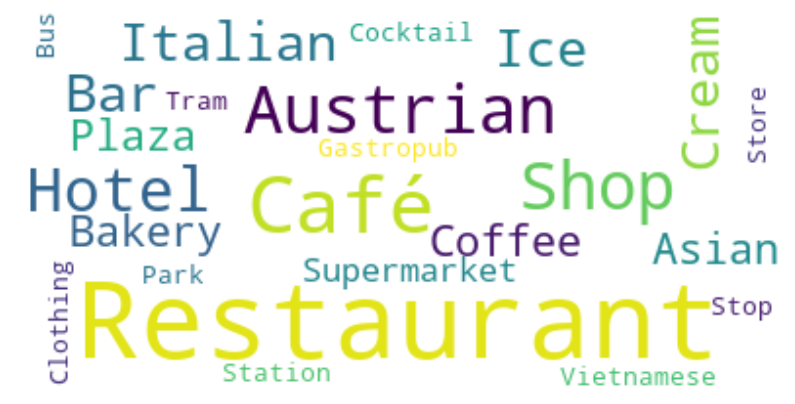

In [71]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Cloud for Singapore

In [72]:
columns_ = ['Sing_Venues','Count'] 

# instantiate the dataframe
S_Venue_Total = pd.DataFrame(columns=columns_)

S_Venue_Total 

Empty DataFrame
Columns: [Sing_Venues, Count]
Index: []

In [73]:
for place in sing_venues['Venue Category']:

    S_Venue_Total = S_Venue_Total.append({'Sing_Venues': place,
                                                         'Count' : sing_venues['District']},
                                                        ignore_index = True)
    


S_Venue_Total.head()

Sing_Venues                                              Count
0   Snack Place  0                    Ang Mo Kio , Singapore
1 ...
1   Supermarket  0                    Ang Mo Kio , Singapore
1 ...
2  Burger Joint  0                    Ang Mo Kio , Singapore
1 ...
3  Noodle House  0                    Ang Mo Kio , Singapore
1 ...
4   Supermarket  0                    Ang Mo Kio , Singapore
1 ...

In [74]:
S_Venue_Total = S_Venue_Total.groupby('Sing_Venues').count()

S_Venue_Total.head()

Count
Sing_Venues               
ATM                      1
Accessories Store        2
Airport                  3
Airport Terminal         1
American Restaurant     11

In [75]:
sum_Sing_Venues = S_Venue_Total['Count'].sum()
sum_Sing_Venues

1779

In [76]:
max_words = 100
word_string1 = ''
for cat in S_Venue_Total.index.values:
        repeat_num_times = int(S_Venue_Total.loc[cat, 'Count']/float(sum_Sing_Venues)*max_words)
        word_string1 = word_string1 + ((cat + ' ') * repeat_num_times)
                                     
# display the generated text
word_string1

'Asian Restaurant Asian Restaurant Asian Restaurant Bakery Bakery Bubble Tea Shop Café Café Café Chinese Restaurant Chinese Restaurant Chinese Restaurant Chinese Restaurant Clothing Store Coffee Shop Coffee Shop Coffee Shop Coffee Shop Coffee Shop Dessert Shop Fast Food Restaurant Fast Food Restaurant Fast Food Restaurant Food Court Food Court Food Court Hotel Hotel Ice Cream Shop Indian Restaurant Italian Restaurant Japanese Restaurant Japanese Restaurant Japanese Restaurant Noodle House Park Sandwich Place Seafood Restaurant Shopping Mall Shopping Mall Steakhouse Supermarket Supermarket Sushi Restaurant Thai Restaurant Vegetarian / Vegan Restaurant '

In [77]:
# create the word cloud
wordcloud1 = WordCloud(background_color='white').generate(word_string1)

print('Word cloud created!')

Word cloud created!


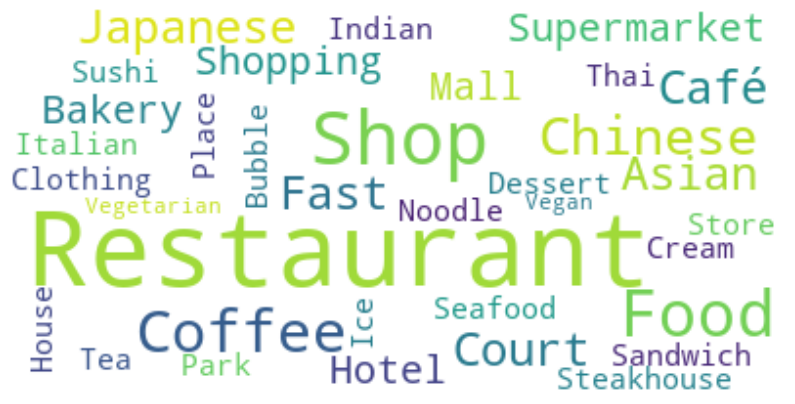

In [78]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

### Most Common Venues

In [79]:
Top_v_venues= V_Venue_Total.reset_index()
Top_v_venues = Top_v_venues.sort_values (by='Count', ascending=True, inplace=False)

Top_v_venues = Top_v_venues.tail(20)
Top_v_venues = Top_v_venues.reset_index()
Top_v_venues.drop(['index'],axis=1, inplace=True)

Top_v_venues.set_index('Vienna_Venues', inplace=True)

Top_v_venues

Count
Vienna_Venues               
Japanese Restaurant        8
Bus Stop                   9
Vietnamese Restaurant     10
Cocktail Bar              10
Gastropub                 11
Tram Station              11
Park                      12
Clothing Store            13
Coffee Shop               17
Bakery                    21
Supermarket               21
Bar                       22
Plaza                     22
Asian Restaurant          23
Ice Cream Shop            28
Italian Restaurant        32
Restaurant                33
Hotel                     35
Austrian Restaurant       42
Café                      64

In [80]:
Top_s_venues= S_Venue_Total.reset_index()
Top_s_venues = Top_s_venues.sort_values (by='Count', ascending=True, inplace=False)

Top_s_venues = Top_s_venues.tail(20)
Top_s_venues = Top_s_venues.reset_index()
Top_s_venues.drop(['index'],axis=1, inplace=True)

Top_s_venues.set_index('Sing_Venues', inplace=True)

Top_s_venues

Count
Sing_Venues                
Thai Restaurant          21
Park                     22
Sandwich Place           24
Italian Restaurant       24
Indian Restaurant        28
Bubble Tea Shop          29
Dessert Shop             34
Sushi Restaurant         35
Noodle House             35
Hotel                    37
Supermarket              37
Bakery                   38
Shopping Mall            46
Fast Food Restaurant     54
Asian Restaurant         60
Café                     62
Food Court               65
Japanese Restaurant      71
Chinese Restaurant       88
Coffee Shop              93

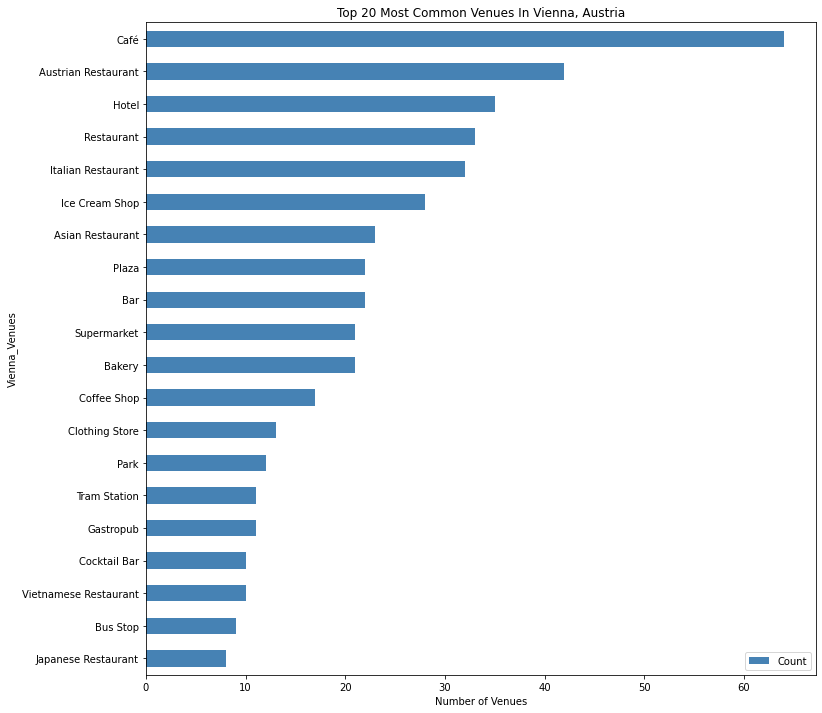

In [96]:
Top_v_venues.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Venues')
plt.title('Top 20 Most Common Venues In Vienna, Austria')

plt.show()

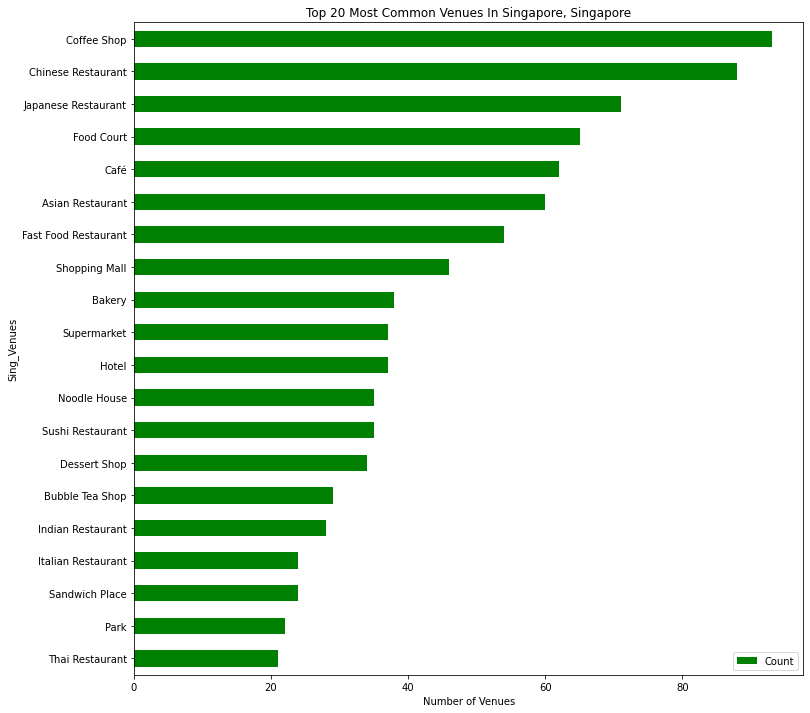

In [97]:
Top_s_venues.plot(kind='barh', figsize=(12, 12), color='green')
plt.xlabel('Number of Venues')
plt.title('Top 20 Most Common Venues In Singapore, Singapore')

plt.show()

### Comparing cluster Structure
- Pie Chart for percentage of each cluster in each city

#### Vienna Cluster Structure

In [83]:
V_clusters = vienna_merged.groupby('Cluster Labels').count()
V_clusters  = V_clusters[['V_Districts']]
#V_clusters.drop(['Latitude','Longitude','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue'],axis=1, inplace =True)

V_clusters=V_clusters.reset_index()
V_clusters

Cluster Labels  V_Districts
0               0            1
1               1            1
2               2            1
3               3            1
4               4           19

In [84]:
#label the clusters
Clus_Names =pd.DataFrame({'Cluster': ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']}) 



In [85]:
V_clusters= pd.concat([V_clusters, Clus_Names], axis=1).reindex(V_clusters.index)
V_clusters.set_index('Cluster', inplace=True)


V_clusters


Cluster Labels  V_Districts
Cluster                               
Cluster 1               0            1
Cluster 2               1            1
Cluster 3               2            1
Cluster 4               3            1
Cluster 5               4           19

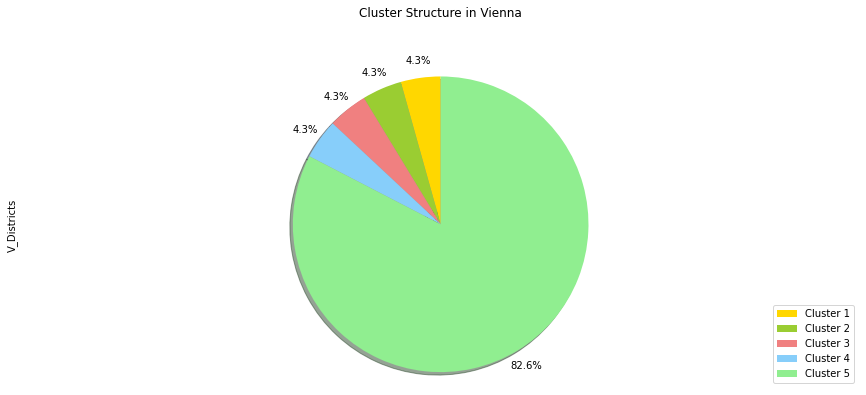

In [86]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']


V_clusters['V_Districts'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,      
                            labels=None,        
                            pctdistance=1.12,    
                            colors=colors_list,
                            )

plt.title('Cluster Structure in Vienna', y=1.12)
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.legend(labels=V_clusters.index, loc='lower right')

plt.show()

#### Singapore Cluster Structure

In [87]:
s_clusters = sing_merged.groupby('Cluster Labels').count()
s_clusters = s_clusters[['S_Areas']]

#s_clusters.drop(['Latitude','Longitude','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue'],axis=1, inplace =True)

s_clusters=s_clusters.reset_index()
s_clusters

Cluster Labels  S_Areas
0             0.0       45
1             1.0        1
2             2.0        1
3             3.0        3
4             4.0        1

In [88]:
s_clusters= pd.concat([s_clusters, Clus_Names], axis=1).reindex(s_clusters.index)
s_clusters.set_index('Cluster', inplace=True)


s_clusters

Cluster Labels  S_Areas
Cluster                           
Cluster 1             0.0       45
Cluster 2             1.0        1
Cluster 3             2.0        1
Cluster 4             3.0        3
Cluster 5             4.0        1

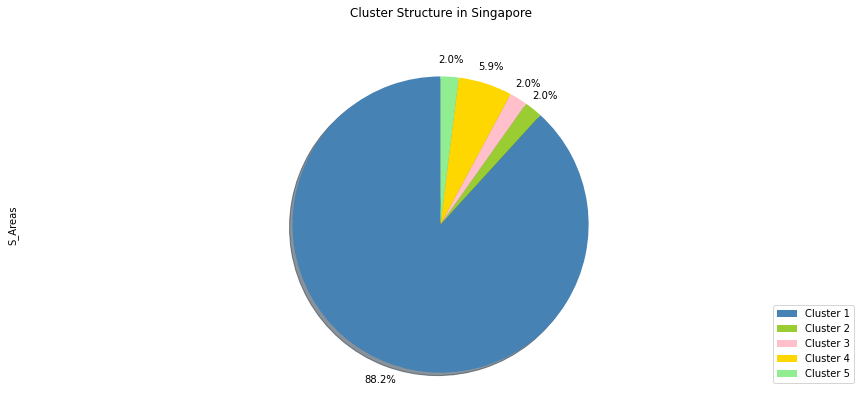

In [89]:
colors_list1 = ['steelblue', 'yellowgreen', 'pink', 'gold', 'lightgreen' ]

s_clusters['S_Areas'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,
                           labels=None,        
                            pctdistance=1.12,    
                            colors=colors_list1  # add shadow      
                            )

plt.title('Cluster Structure in Singapore', y=1.12)
plt.axis('equal')

plt.legend(labels=s_clusters.index, loc='lower right')
plt.show()

### Greenspace

In [94]:

# create map of Vienna using latitude and longitude values
map_greenvienna = folium.Map(location=[Vienna_latitude, Vienna_longitude], zoom_start=11, tiles='Stamen Terrain')

# add markers to map
for lat, lng,venue in zip(vienna_venues['Venue Latitude'], vienna_venues['Venue Longitude'],vienna_venues['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_greenvienna)  
    
map_greenvienna

In [95]:

# create map of Vienna using latitude and longitude values
map_greensing = folium.Map(location=[Sing_latitude, Sing_longitude], zoom_start=11, tiles='Stamen Terrain')

# add markers to map
for lat, lng,venue in zip(sing_venues['Venue Latitude'], sing_venues['Venue Longitude'],sing_venues['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_greensing)  
    
map_greensing